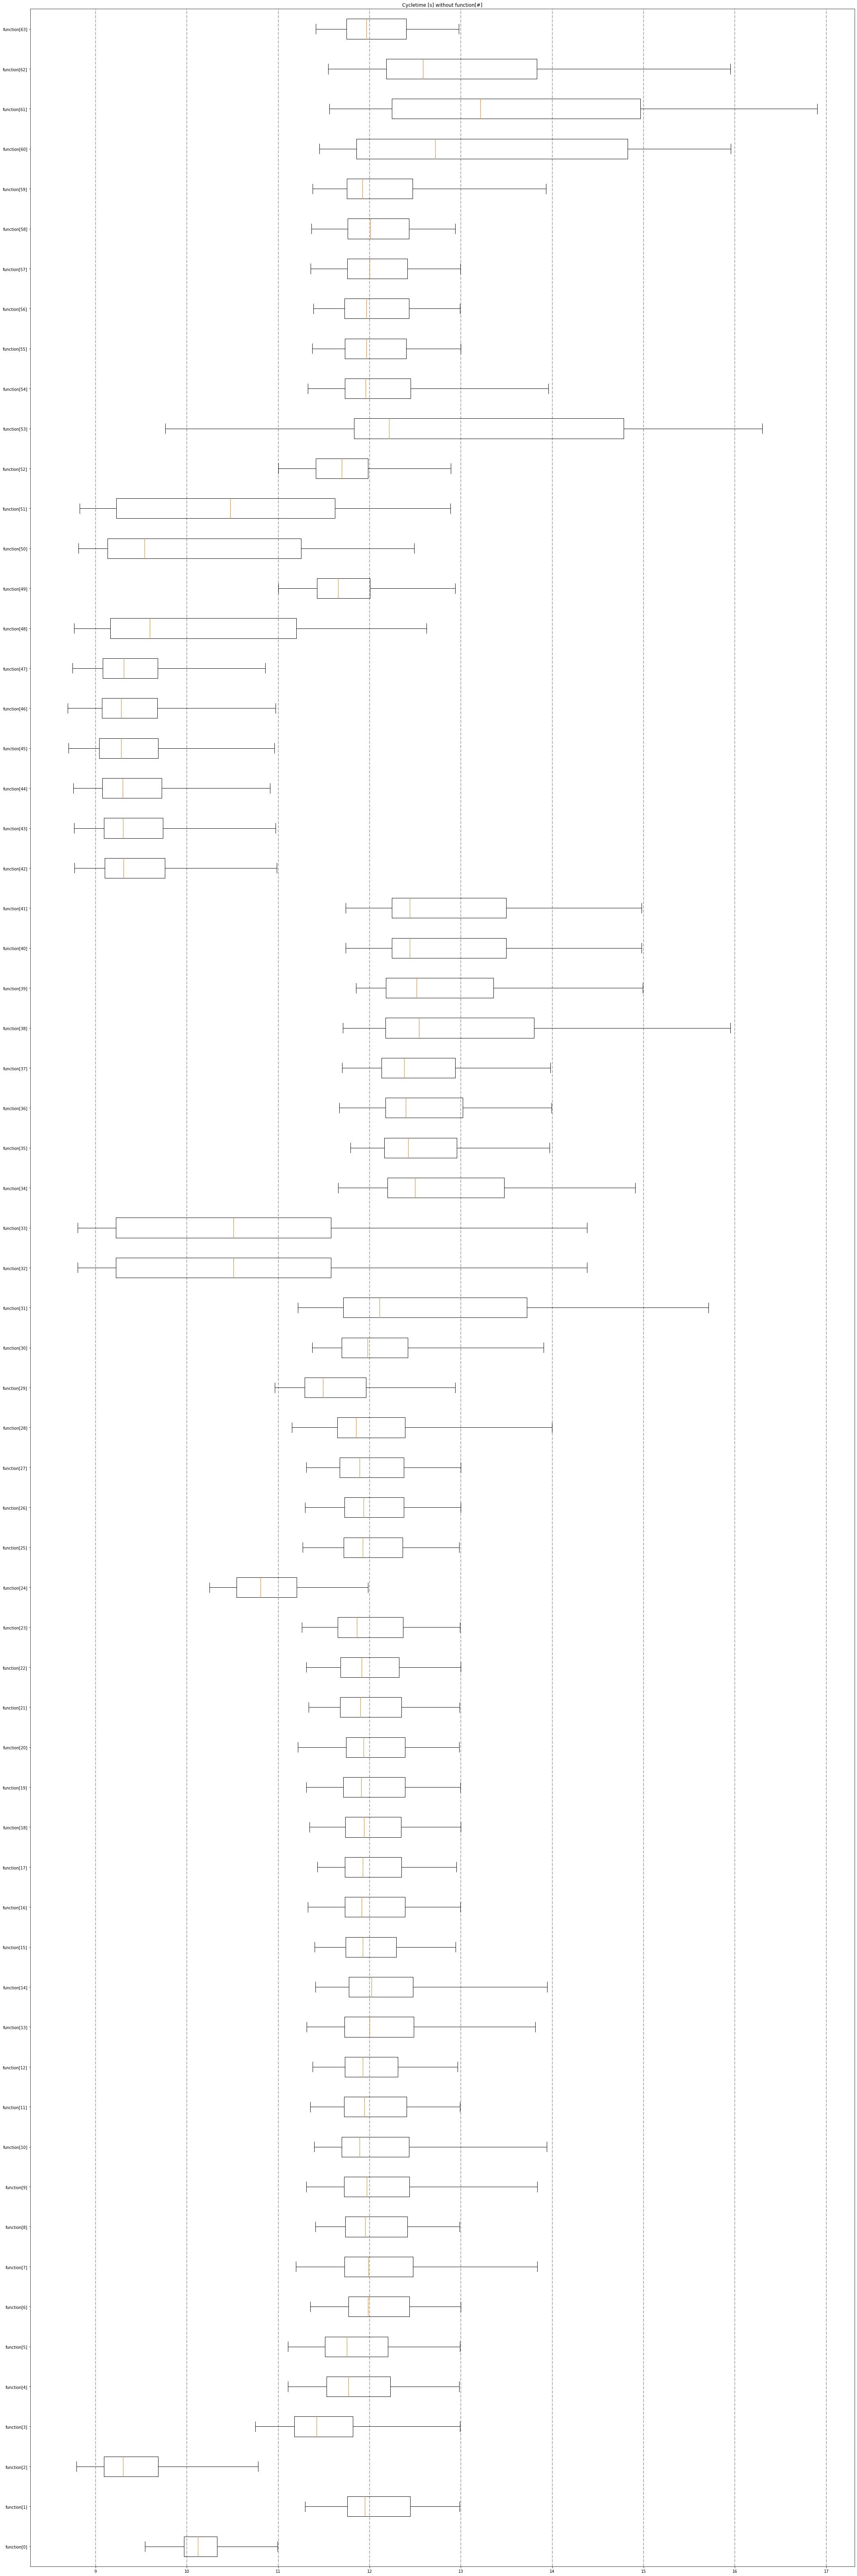

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.ticker import (MultipleLocator)
import csv
import pathlib


file = "main_calls.csv"
responseSize = 3
data = []
func = False
with open('main_calls.csv') as plotValues:
    spamreader = csv.reader(plotValues, delimiter='\t', quotechar='|')
    stat = {}
    for row in spamreader:
        try:
            if row[1] == '':
                function = row[0][8:]
                stat = {}
                stat['label'] = row[0]
                func = True

            if row[0] == '':
                func = False
            if func == True:
                if row[0] == 'outlierMax':
                    pass
                 #   stat['outlierMax'] = row[1]

                if row[0] == 'max':
                    stat['whishi'] = float(row[1])

                if row[0] == 'q75':
                    stat['q3'] = float(row[1])

                if row[0] == 'median':
                    stat['med'] = float(row[1])

                if row[0] == 'q25':
                    stat['q1'] = float(row[1])

                if row[0] == 'min':
                    stat['whislo'] = float(row[1])

                if row[0] == 'outlierMin':
                    pass
                #    stat['outlierMin'] = row[1]

                if row[0] == 'skewness':
                    #    stat['skewness'] = row[1]
                    data.append(stat)
        except IndexError:
            None

#
outlierMax = 15.625
max = 10.99152
q75 = 10.331111
median = 10.1226935
q25 = 9.968218
min = 9.54068
outlierMin = 0.0
skewness = 0.148644366245696

stats = [{
    "label": '1',  # not required
    "med": median,
    "q1": q25,
    "q3": q75,
    # "cilo": 5.3 # not required
    # "cihi": 5.7 # not required
    "whislo": min,  # required
    "whishi": max,  # required
    "fliers": [outlierMax, outlierMin]  # required if showfliers=True
}]

fig1, ax1 = plt.subplots(sharey=True, sharex=True, figsize=(30, 90))
ax1.set_title('Cycletime [s] without function[#]')
# ax1.boxplot(data)
ax1.bxp(data, showfliers=False, vert=False, meanline=True)
ax1.xaxis.set_major_locator(MultipleLocator(1))
plt.tight_layout()
plt.grid(True, which='both', axis='x', linewidth=2, linestyle='--')
plt.show()
